# GENESIM with distance weighing

Mariethoz et al. (2010) propose to weight conditonal data by distance. This is implemented with mps_genesim, and can be controlled by

    O.par['distance_measure'] # Distance measure [1]: discrete, [2]: continous
    O.par['distance_min'] ; # Max distance
    O.par['distance_pow'] ; # Power

See details about distance weighing in [Mariethoz, Gregoire, Philippe Renard, and Julien Straubhaar. "The direct sampling method to perform multiple‐point geostatistical simulations." Water Resources Research 46.11 (2010).
](https://doi.org/10.1029/2008WR007621).

In [1]:
# import mpslib as mps
import matplotlib.pyplot as plt
import numpy as np
import mpslib as mps


In [2]:
O=mps.mpslib(method='mps_genesim', 
             verbose_level=-1, 
             n_cond = 25,
             n_real=1, 
             simulation_grid_size=np.array([50, 50, 1]));

O.ti, TI_filename = mps.trainingimages.strebelle(4, coarse3d=0)

distance_max=0 distance_pow=0, t=1.46s
distance_max=0 distance_pow=1, t=4.82s
distance_max=0 distance_pow=2, t=5.24s
distance_max=0.02 distance_pow=0, t=1.54s
distance_max=0.02 distance_pow=1, t=5.35s
distance_max=0.02 distance_pow=2, t=5.11s
distance_max=0.04 distance_pow=0, t=1.52s
distance_max=0.04 distance_pow=1, t=4.71s
distance_max=0.04 distance_pow=2, t=5.04s
distance_max=0.06 distance_pow=0, t=0.53s
distance_max=0.06 distance_pow=1, t=1.45s
distance_max=0.06 distance_pow=2, t=0.70s
distance_max=0.08 distance_pow=0, t=0.52s
distance_max=0.08 distance_pow=1, t=1.47s
distance_max=0.08 distance_pow=2, t=0.71s
distance_max=0.1 distance_pow=0, t=0.53s
distance_max=0.1 distance_pow=1, t=1.45s
distance_max=0.1 distance_pow=2, t=0.69s
distance_max=0.12 distance_pow=0, t=0.52s
distance_max=0.12 distance_pow=1, t=1.43s
distance_max=0.12 distance_pow=2, t=0.71s
distance_max=0.14 distance_pow=0, t=0.51s
distance_max=0.14 distance_pow=1, t=1.46s
distance_max=0.14 distance_pow=2, t=0.73s
dist

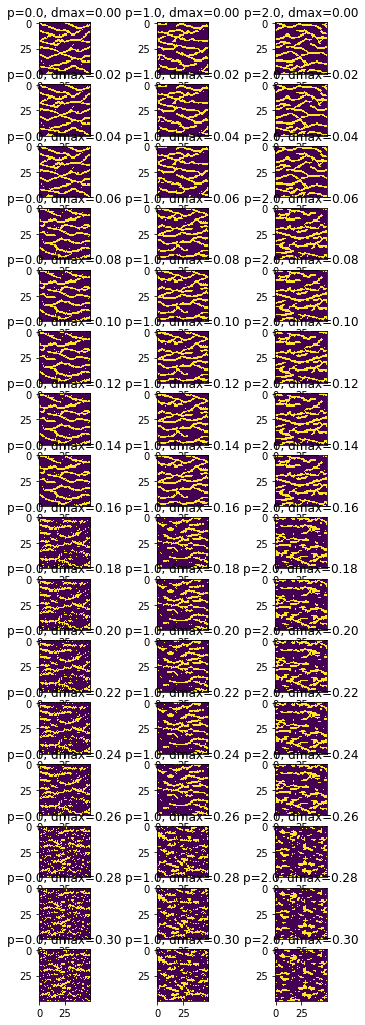

In [3]:
distance_max_arr = [0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.30]
distance_pow_arr = [0, 1, 2]

n1=len(distance_max_arr)
n2=len(distance_pow_arr)

T=np.zeros((n1,n2))

fig = plt.figure(figsize=(6, 18))
for i1 in np.arange(n1):
    for i2 in np.arange(n2):
        
        O.par['distance_max']=distance_max_arr[i1]
        O.par['distance_pow']=distance_pow_arr[i2]
        O.par['distance_measure']=1 # discrete
        O.run()
        T[i1,i2]=O.time
        
        print('distance_max=%g distance_pow=%g, t=%4.2fs' % (O.par['distance_max'],O.par['distance_pow'],T[i1,i2]))
        
        
        isp = i1*n2+i2+1    
        plt.subplot(n1,n2,isp)
        D=np.squeeze(np.transpose(O.sim[0]));
        plt.imshow(D, interpolation='none', vmin=0, vmax=1)
        plt.title('p=%3.1f, dmax=%3.2f' % (O.par['distance_pow'],O.par['distance_max']) )
            

Text(0, 0.5, 'Time (s)')

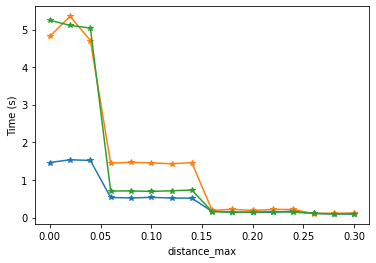

In [4]:
plt.plot(distance_max_arr,T,'-*')
plt.xlabel('distance_max')
plt.ylabel('Time (s)')
#plt.legend()

In [5]:
O.par


{'n_real': 1,
 'rseed': 1,
 'n_max_cpdf_count': 1,
 'out_folder': '.',
 'ti_fnam': 'ti.dat',
 'simulation_grid_size': array([50, 50,  1]),
 'origin': array([0., 0., 0.]),
 'grid_cell_size': array([1, 1, 1]),
 'mask_fnam': 'mask.dat',
 'hard_data_fnam': 'hard.dat',
 'shuffle_simulation_grid': 2,
 'entropyfactor_simulation_grid': 4,
 'shuffle_ti_grid': 1,
 'hard_data_search_radius': 1,
 'soft_data_categories': array([0, 1]),
 'soft_data_fnam': 'soft.dat',
 'n_threads': -1,
 'debug_level': -1,
 'do_estimation': 0,
 'do_entropy': 0,
 'n_cond': 25,
 'n_cond_soft': 1,
 'n_max_ite': 1000000,
 'distance_measure': 1,
 'distance_max': 0.3,
 'distance_pow': 2,
 'colocate_dimension': 0,
 'max_search_radius': 10000000,
 'max_search_radius_soft': 10000000}